### Prosper Loan Data Visualization
by Ashenafi Kifleyohans

#### introduction to the dataset
The 113,937 loans in this data collection have an average of 81 characteristics, such as loan amount, borrower rate (or interest rate), current loan status, borrower income, and many more.

We are attempting to respond to these inquiries.

1, What elements influence the outcome status of a loan?

2, Which factors influence the borrower's APR or interest rate?

3, Are there variations in loans based on the size of the initial loan amount?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset
loans = pd.read_csv("prosperLoanData.csv")

loans.shape

(113937, 81)

In [3]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


I'm only going to choose the 81 columns that are relevant to our investigation of the loan out of the 113937 rows and 81 columns. I'll pick 15 or so columns to research. These columns pertain to the loan amount, dates, interest rates, and other borrower characteristics.

In [4]:
df_loans = loans.loc[:, ['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
                         'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'AmountDelinquent',
                         'IncomeRange', 'StatedMonthlyIncome',
                         'LoanCurrentDaysDelinquent',
                         'LoanOriginalAmount', 'LoanOriginationDate', 
                         'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors']]
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   ProsperRating (Alpha)      84853 non-null   object 
 8   ProsperScore               84853 non-null   float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  AmountDelinquent           10

In [5]:
df_loans.duplicated().sum()

0

In [6]:
df_loans.isnull().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
AmountDelinquent              7622
IncomeRange                      0
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
LoanOriginationDate              0
MonthlyLoanPayment               0
LP_ServiceFees                   0
Investors                        0
dtype: int64

In [7]:
df_loans.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,0,...,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12 00:00:00,330.43,-133.18,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03 00:00:00,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,0,...,Not available,NaN,Not displayed,2083.333333,0,3001,2007-01-17 00:00:00,123.32,-24.20,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01 00:00:00,321.45,-108.01,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20 00:00:00,563.97,-60.27,20


In [8]:
#Adjust Datetime columns
df_loans['ListingCreationDate'] = pd.to_datetime(df_loans['ListingCreationDate']) 
df_loans['ClosedDate'] = pd.to_datetime(df_loans['ClosedDate'])
df_loans['LoanOriginationDate'] = pd.to_datetime(df_loans['LoanOriginationDate'])
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  object        
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   LenderYield                113937 non-null  float64       
 7   ProsperRating (Alpha)      84853 non-null   object        
 8   ProsperScore               84853 non-null   float64       
 9   ListingCategory (numeric)  113937 non-null  int64         
 10  BorrowerState              108422 non-null  object        
 11  Occupation                 110349 non-null  object  

In [9]:
# Convert ProsperRating & IncomeRange to ordinal categorical 
ordinal_var_dict = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_loans[var] = df_loans[var].astype(ordered_var)

In [10]:
df_loans['ProsperRating (Alpha)'].value_counts()

C      18345
B      15581
A      14551
D      14274
E       9795
HR      6935
AA      5372
N/A        0
Name: ProsperRating (Alpha), dtype: int64

In [11]:
df_loans['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
$0                  621
Name: IncomeRange, dtype: int64

In [12]:
#Adjust datatype for all other categorical columns
df_loans['Occupation'] = df_loans['Occupation'].astype('category')
df_loans['BorrowerState'] = df_loans['BorrowerState'].astype('category')
df_loans['LoanStatus'] = df_loans['LoanStatus'].astype('category')
df_loans['ListingCategory (numeric)'] = df_loans['ListingCategory (numeric)'].astype('category')
df_loans['EmploymentStatus'] = df_loans['EmploymentStatus'].astype('category')


In [13]:
df_loans['Occupation'].value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [14]:
df_loans.shape

(113937, 22)

In [15]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  category      
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   LenderYield                113937 non-null  float64       
 7   ProsperRating (Alpha)      84853 non-null   category      
 8   ProsperScore               84853 non-null   float64       
 9   ListingCategory (numeric)  113937 non-null  category      
 10  BorrowerState              108422 non-null  category      
 11  Occupation                 110349 non-null  category

How is your dataset structured?
There are 22 columns and 113937 rows in the dataset. The majority of the columns are numerical, but we also include date/time variables and category categories (both nominal and ordinal).

What primary feature(s) of your dataset most interest you?
If necessary, I will deal with the borrower rate, borrower APR, prosper score, credit score, initial loan amount, monthly payment, occupation, state, and other factors.

There are a few crucial aspects to consider, such as:

1, BorrowerAPR: The annual percentage rate (APR) that the borrower will pay on the loan.

2, ProsperScore: A unique risk assessment created utilizing Prosper's past data. The score is on a scale from 1 to 10, with 10 being the best or lowest risk. For loans that were started after July 2009.

3, LoanOrigination. Date: The day the loan was originally offered.

4, LenderYield: The lender yield on the loan. The lender yield is the loan interest rate less the servicing expense.

What aspects of the dataset do you believe will support your analysis of your target feature(s)?

Loan Status and Employment Status, in my opinion, will significantly affect loans and the characteristics we are attempting to explore. Additionally, the Monthly Income and the Term (the length of the loan) will both be important factors. Therefore, I'll try to visit these more often.

Univariate Exploration

I'll start with the most crucial characteristics: Loan Original Amount, Prosper Score, and Borrower APR

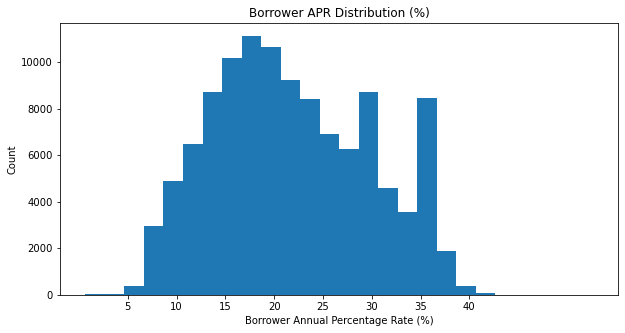

In [16]:
# Distribution of Borrower APR in percentage 
binsize = 2
borrowe_APR_percentage = df_loans['BorrowerAPR']*100
bins = np.arange(df_loans['BorrowerAPR'].min()*100, df_loans['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borrowe_APR_percentage, bins = bins)
plt.title('Borrower APR Distribution (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show()

We observe that the borrower APR often fluctuates between 15 and 20 percent, with a small increase to 35 percent.

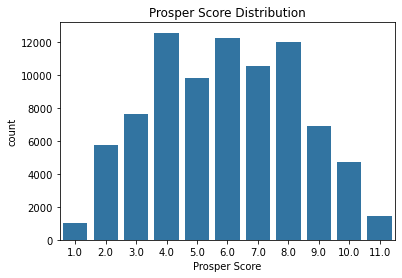

In [17]:
#Prosper Score Distribution (range form 1 to 10)
base_color = sb.color_palette()[0]
sb.countplot(data=df_loans, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

The most frequent Prosper Score numbers are 4, 6, and 8, and they are almost regularly distributed.

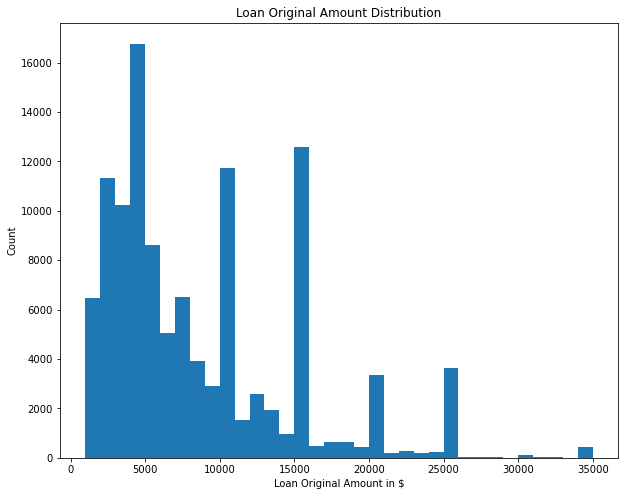

In [18]:
# Loan Original Amount Distribution
binsize = 1000
bins = np.arange(df_loans['LoanOriginalAmount'].min(), df_loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df_loans, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.show()

We can see that the distribution has a long tail and is right skewed, so I'll test it in log scale to observe it more clearly.

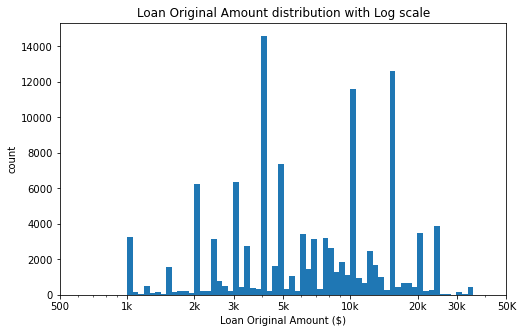

In [19]:
# Putting Loan Original Amount in a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df_loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount distribution with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

The largest original loan amount is from $3,000 to $5,000. Additionally, I see an uptick between 10K and 20K.

In [20]:
#Checking loans' term (expressed in months)
df_loans['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

As a result, it is clear that years can be measured in terms of either 1 year (12 months), 3 years (36 months), or 5 years (60 months)

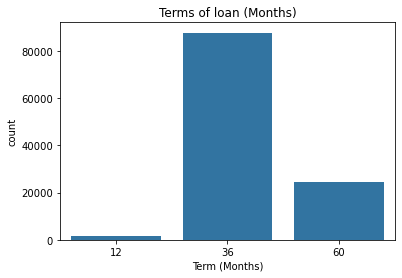

In [21]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_loans,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

We note that the majority of values are in the last three years (36 months)

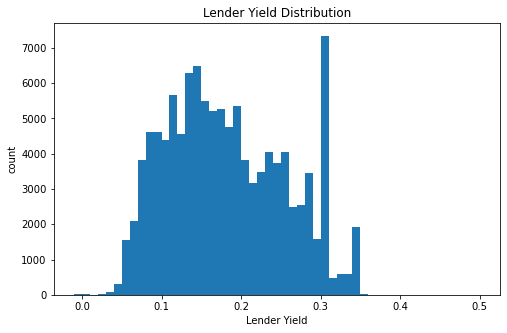

In [22]:
#Lender Yield Distribution
binsize = 0.01
bins = np.arange(df_loans['LenderYield'].min(), df_loans['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')
plt.ylabel('count')
plt.show()

Lender Yield is observed to be normally distributed, with the majority of values falling between 0.1 and 0.2, with an increase at 0.3.

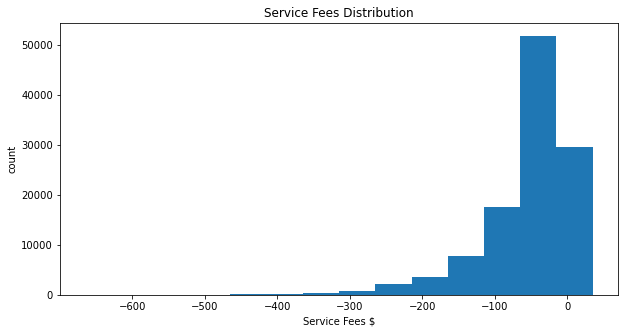

In [23]:
# Service Fees Distribution
binsize = 50
bins = np.arange(df_loans['LP_ServiceFees'].min(), df_loans['LP_ServiceFees'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans, x = 'LP_ServiceFees', bins = bins)
plt.xlabel('Service Fees $')
plt.title('Service Fees Distribution')
plt.ylabel('count')
plt.show()

Service fees are left skewed, as we can see, but the negative values prevent us from putting them on the log scale.

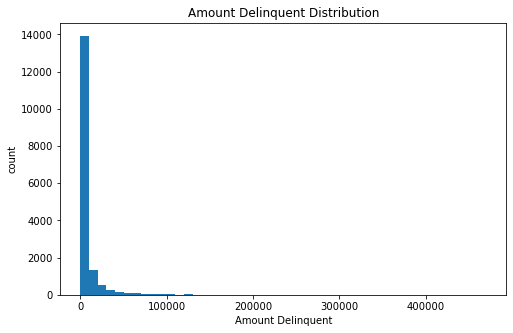

In [24]:
#Amount Delinquent Distribution
binsize = 10000
bins = np.arange(df_loans['AmountDelinquent'].min(), df_loans['AmountDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans[df_loans['AmountDelinquent']>0], x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution')
plt.xlabel('Amount Delinquent')
plt.ylabel('count')
plt.show()

In [25]:
df_loans['AmountDelinquent'].max()

463881.0

In [26]:
df_loans['AmountDelinquent'].min()

0.0

In [27]:
df_loans['AmountDelinquent'].value_counts()

0.0        89818
50.0          73
100.0         67
25.0          66
30.0          65
           ...  
14910.0        1
1280.0         1
13180.0        1
2023.0         1
5062.0         1
Name: AmountDelinquent, Length: 7059, dtype: int64

We can see that Amount Delinquent is right-skewed, but this makes it difficult to draw conclusions. Therefore, let's try log scale.

Additionally, the majority of the loans are current as we can see from the 89818 delinquencies at 0 percent. This should be checked in log-scale.

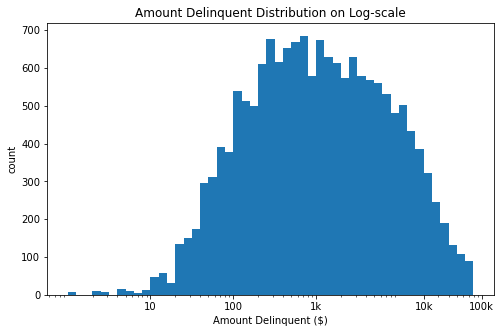

In [28]:
#Amount Delinquent Distribution on a log scale

log_binsize = 0.1
bins = 10 ** np.arange(0,5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution on Log-scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 2e4, 1e5], ['10', '100', '1k', '10k', '100k'])
plt.xlabel('Amount Delinquent ($)')
plt.ylabel('count')
plt.show()

It is obvious that most amounts delinquent falls around $1000 and it is normally distibuted

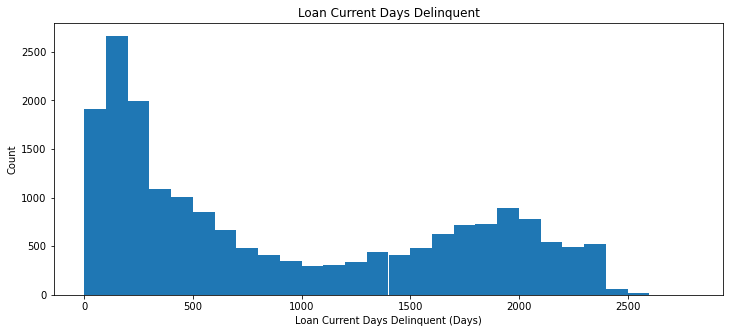

In [29]:
# Loan Current Days Delinquent Distribution
binsize = 100
bins = np.arange(0, df_loans['LoanCurrentDaysDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_loans[df_loans['LoanCurrentDaysDelinquent']>0], x = 'LoanCurrentDaysDelinquent', bins = bins)
plt.title('Loan Current Days Delinquent')
plt.xlabel('Loan Current Days Delinquent (Days)')
plt.ylabel('Count')
plt.show()

Most of delinquent are on the first 500 days and the distribution is bimodal.

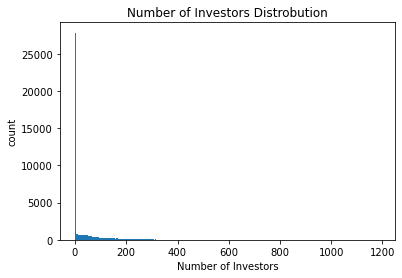

In [30]:
#Number of Investors Distrobution
binsize = 1
bins = np.arange(df_loans['Investors'].min(), df_loans['Investors'].max()+binsize, binsize)

#plt.figure(figsize=[8, 5])
plt.hist(data = df_loans[df_loans['Investors'] > 0], x = 'Investors', bins = bins)
plt.xlabel('Number of Investors')
plt.title('Number of Investors Distrobution')
plt.ylabel('count')
plt.show()

We can't see this distribution well so let's try log scale as it may work better

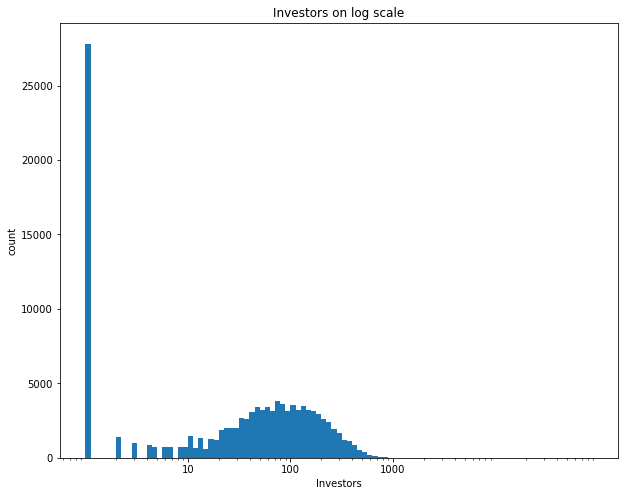

In [31]:
#Number of Investors Distrobution on log scale for all loans
log_binsize = 0.05
bins = 10 ** np.arange(0, 5, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df_loans, x = 'Investors', bins = bins)
plt.title('Investors on log scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('count')
plt.show()

Most of loans has around 100 investors

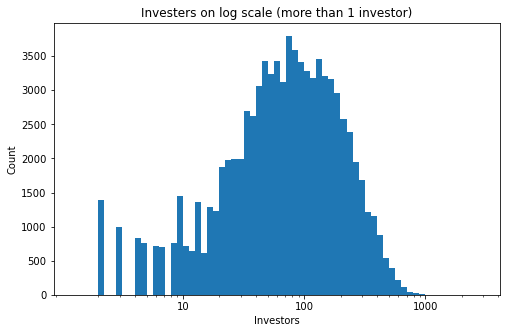

In [32]:
#We can plot the same for only loans with more than 1 investor
log_binsize = 0.05
bins = 10 ** np.arange(0.1, 3.5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'Investors', bins = bins)
plt.title('Investers on log scale (more than 1 investor)')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('Count')
plt.show()

Number of investors (for data with number of inestoers more than 1) is almost normally distributed around 100 and that was expected from the previce one

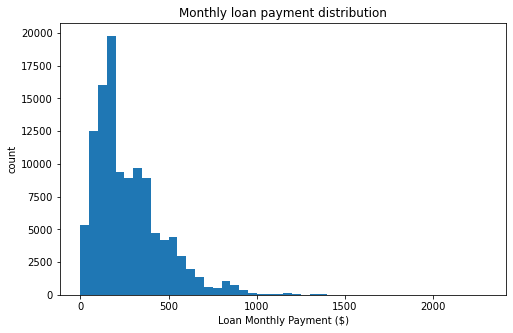

In [33]:
# Monthly loan payment distribution
binsize = 50
bins = np.arange(0, df_loans['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Loan Monthly Payment ($)')
plt.ylabel('count')
plt.title('Monthly loan payment distribution')
plt.show()

There's a long tail in the distribution, so let's put it on a log scale instead

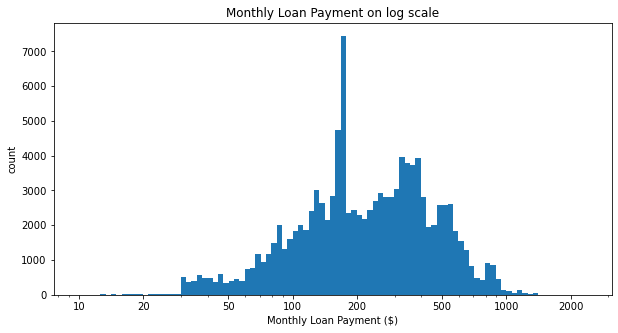

In [34]:
# Using log-scale
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df_loans['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('count')
plt.title('Monthly Loan Payment on log scale')
plt.show()

The is normally distributed with the peak between 100 and 200 and some increase at the 500

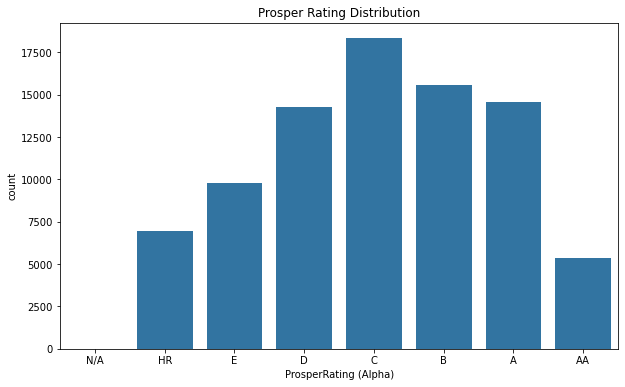

In [35]:
# Prosper Rating Distribution

plt.figure(figsize=[10, 6]);
sb.countplot(data=df_loans,x='ProsperRating (Alpha)',color=base_color);
plt.title('Prosper Rating Distribution');

Most borrowers get Prosper Rating of 'C'

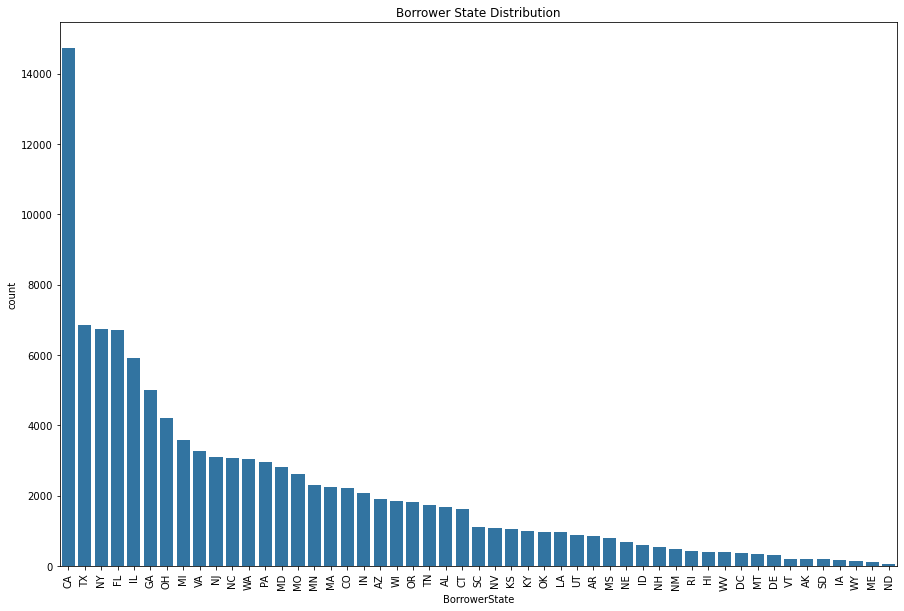

In [36]:
#Borrower State Distrobution
cat_order = df_loans['BorrowerState'].value_counts().index
plt.figure(figsize=[15, 10])
sb.countplot(data=df_loans,x='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');
plt.xticks(rotation=90);

We can see that California (CA), Texas (TX) and New York (NY) have the 3 biggest numbers of loans originated in that period of time.

Text(0.5, 1.0, 'Borrower Income Range Distribution')

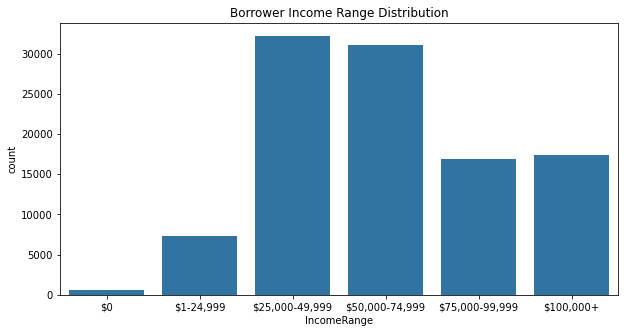

In [37]:
#Borrower Income Range Status Distrobution
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans,x='IncomeRange',color=base_color);
plt.title('Borrower Income Range Distribution')

We can see that people with income range of $25,000-49,999 are the ones who are taking loans most

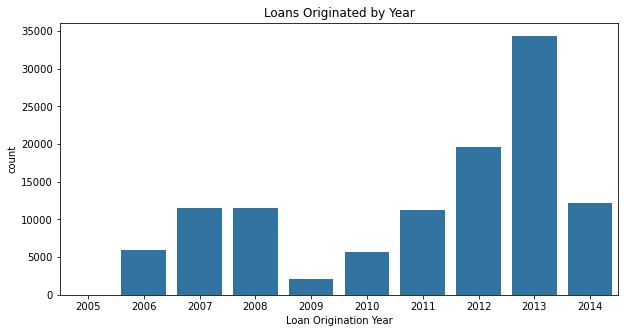

In [38]:
# Loan Origination by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans,x=df_loans['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

We can see that there is a drop in 2009 in loans but it started to increase gradually and reached it's peak at 2013

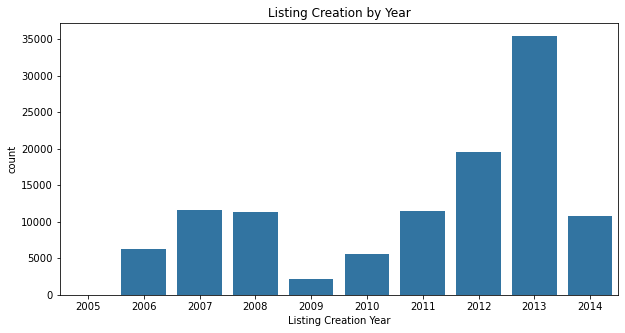

In [39]:
# Listing Creation  by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans,x=df_loans['ListingCreationDate'].dt.year,color=base_color)
plt.title('Listing Creation by Year')
plt.xlabel('Listing Creation Year');

The same observation as the previous chart which is expected because we normally create the list every year.

#### Talk about the distributions of your relevant variable(s). Were there any odd occurrences? Did you have any transformations to make?

I applied a log transformation to the distribution of loan original amount, which is right skewed, in order to interpret the picture. These variables, Monthly Loan Payment, Investors, and Amount Delinquent, likewise underwent the log transformation.

The most loans were originated in the year 2013. The state of California (CA) had the most loans. Although the service costs were left skewed, I was unable to apply the log scale due to the negative amounts.

#### Was there any odd distribution among the features you looked at? Did you manipulate the data in any way to clean it up, make adjustments, or change its format? If so, what motivated your actions?

The distribution was truly on a wide scale and I couldn't see it well because of the large difference between the AmountDelinquent values, so I applied the log transformation.

A log scale was used to represent the concealed distribution in some places for features with long-tailed, skewed distributions.

### Bivariate Exploration

We need to recognize numerical and categorical properties in order to choose the appropriate chart type to explore variables in pairs.

In [40]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  category      
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   LenderYield                113937 non-null  float64       
 7   ProsperRating (Alpha)      84853 non-null   category      
 8   ProsperScore               84853 non-null   float64       
 9   ListingCategory (numeric)  113937 non-null  category      
 10  BorrowerState              108422 non-null  category      
 11  Occupation                 110349 non-null  category

In [41]:
numeric_variables = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 
                     'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors',
                    'AmountDelinquent','LoanCurrentDaysDelinquent']

In [42]:
categorical_variables = ['LoanStatus', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
                         'EmploymentStatus', 'IncomeRange']

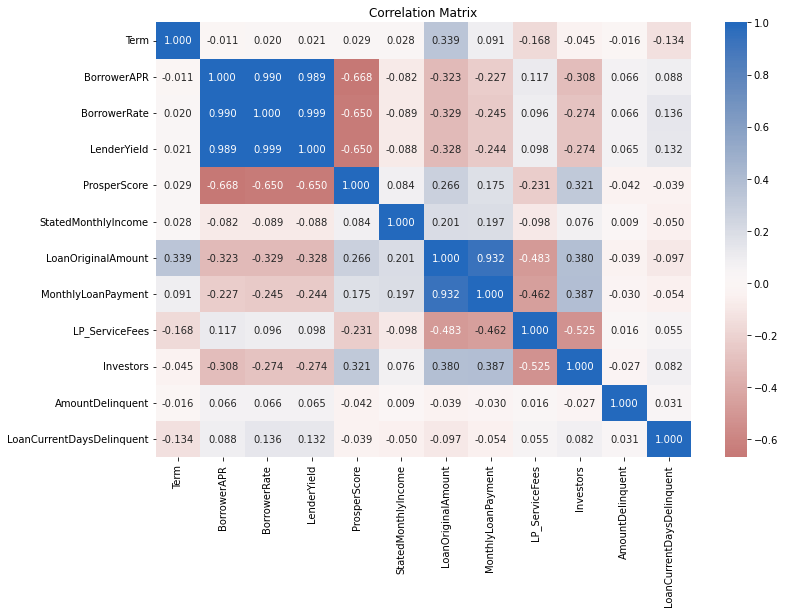

In [43]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [12, 8])
sb.heatmap(df_loans[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

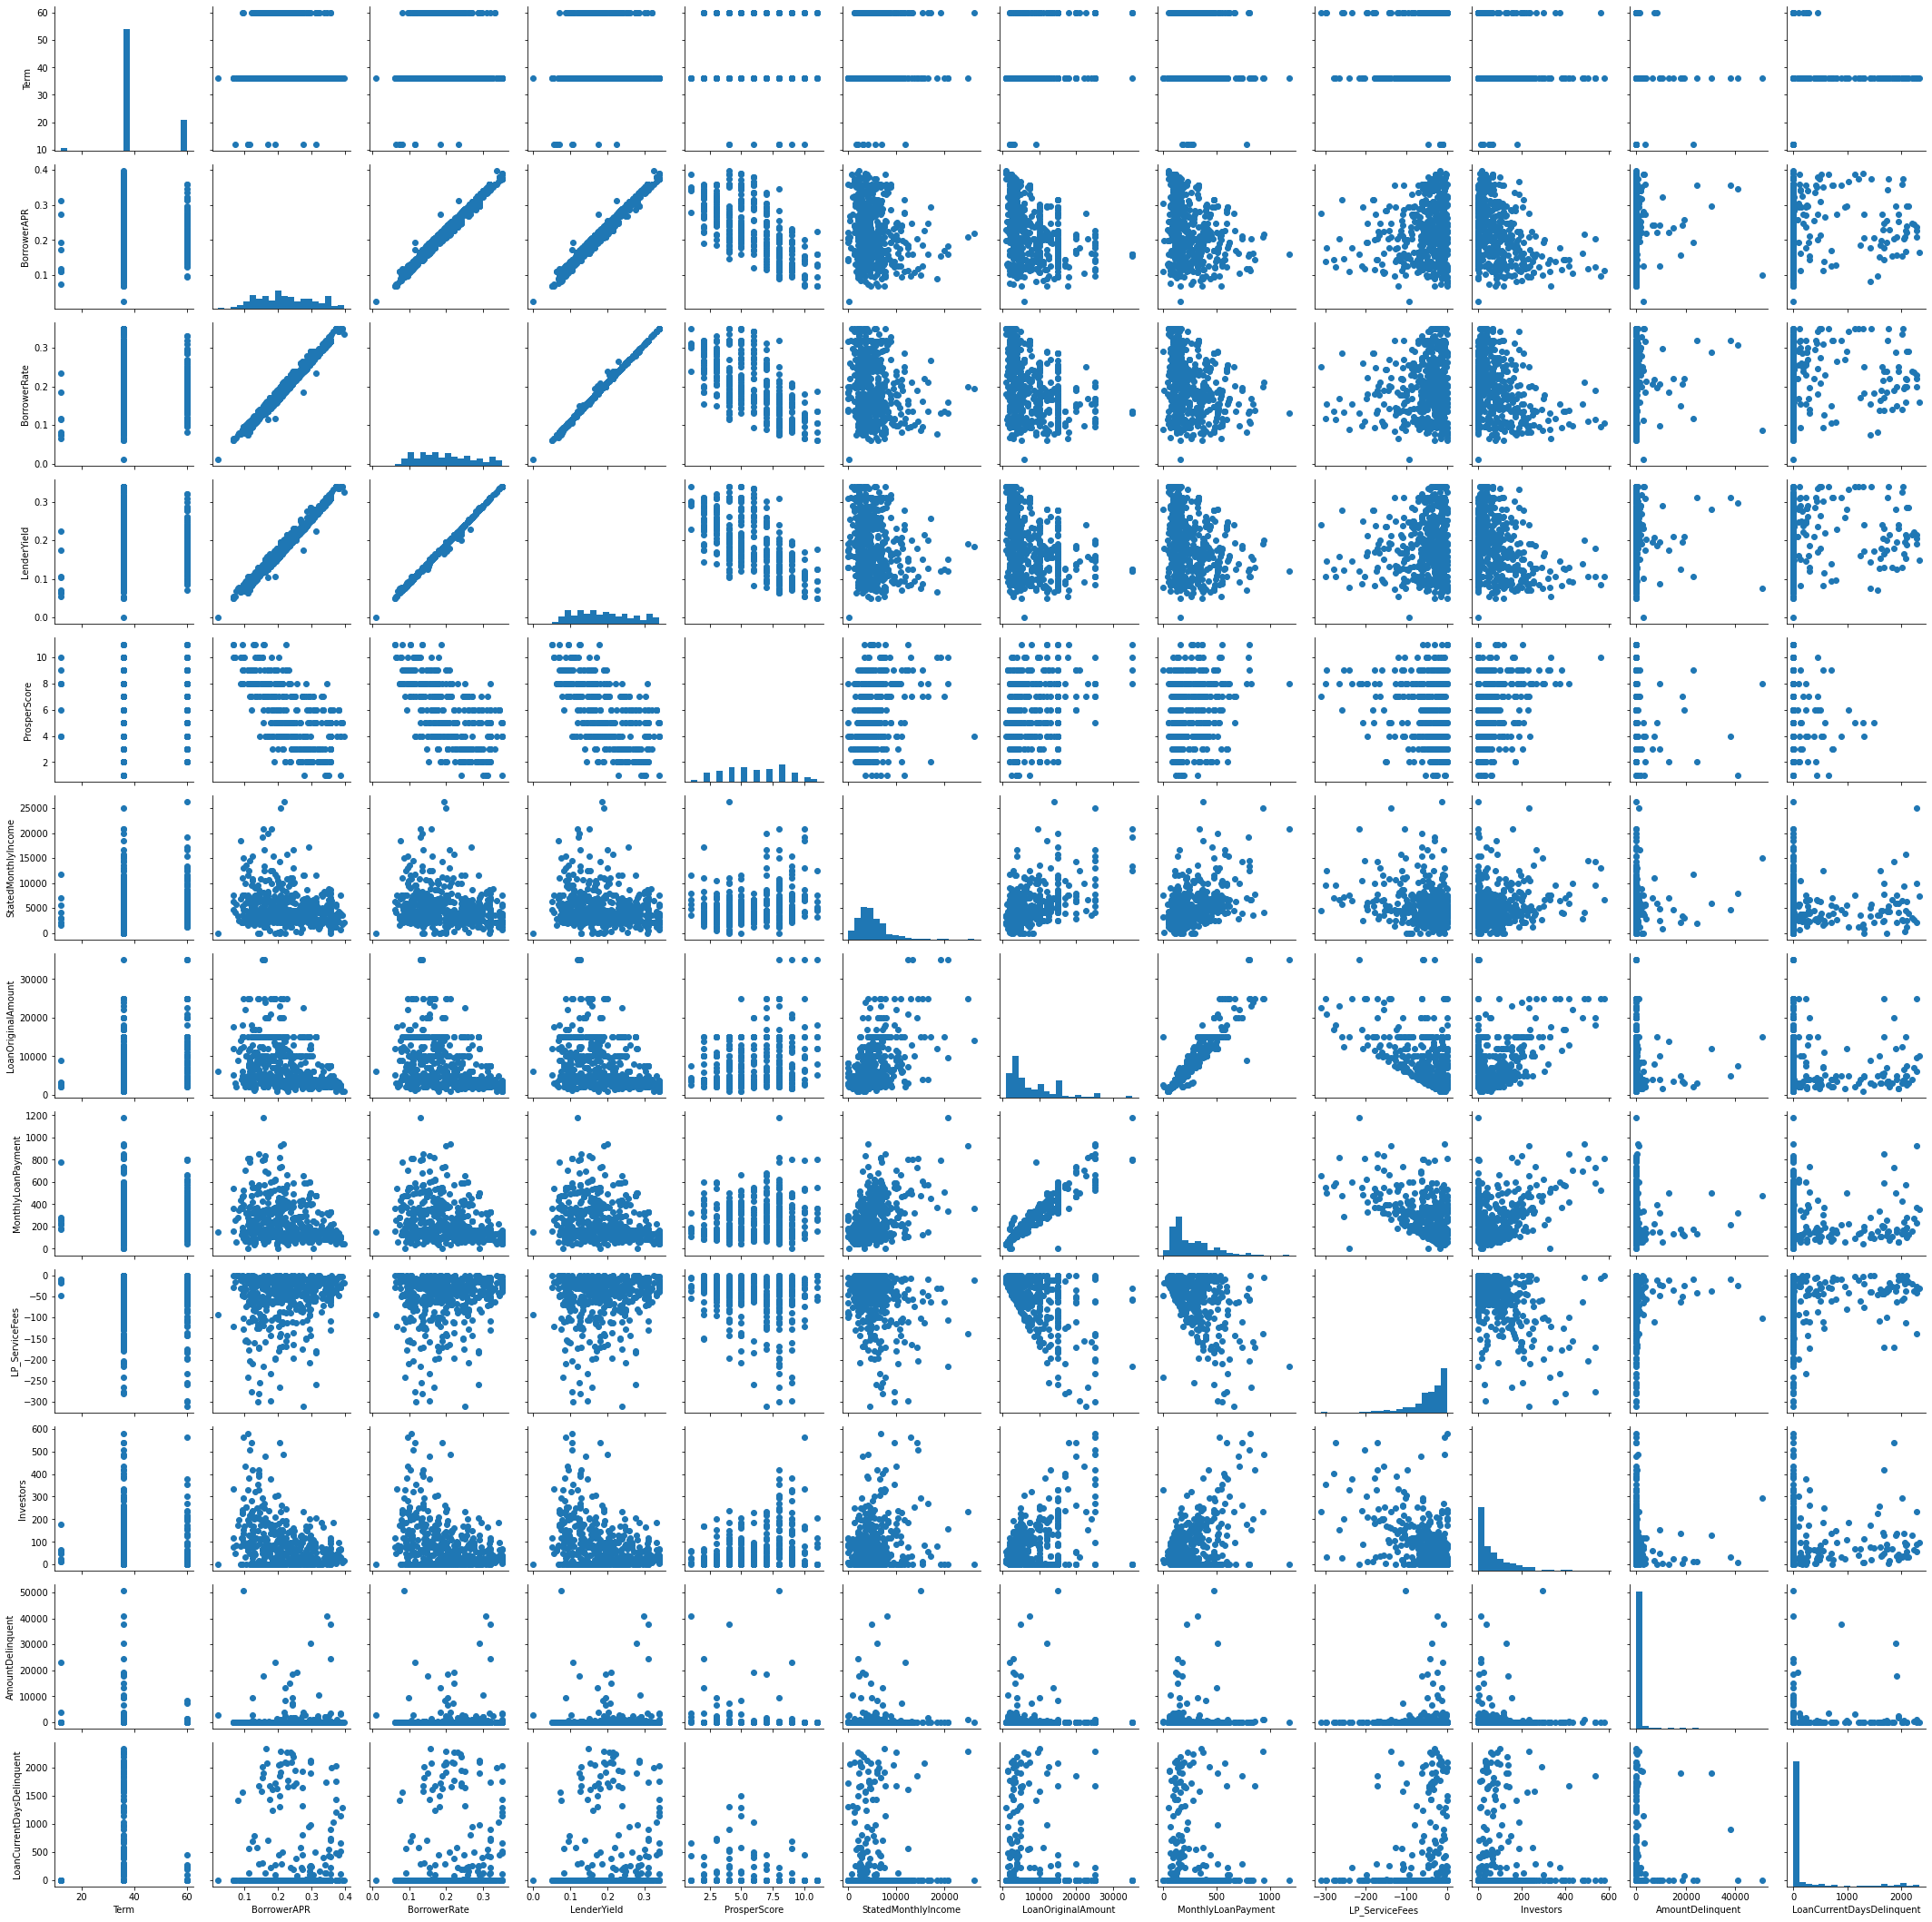

In [44]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(df_loans.shape[0], 500, replace = False)
df_loans_samp = df_loans.loc[samples,:]

g = sb.PairGrid(data = df_loans_samp, vars = numeric_variables)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

There are significant positive relationships between borrower APR and lender yield. A favorable link exists between Prosper Score and Prosper Rating. There is a small positive link between credit scores in the upper range and prosper scores.

APR and lender yield have a negative link with flourish score. Prosper ratings and APR have a negative link, as do Prosper scores and Lender yield.

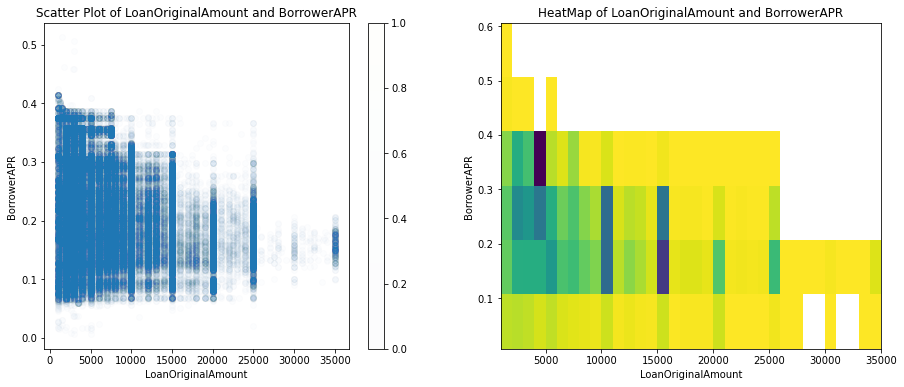

In [45]:
# Checking the relation between LoanOriginalAmount and BorrowerAPR

plt.figure(figsize = [15, 6]) 
plt.subplot(1, 2, 1)
plt.scatter(data = df_loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.01)
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');
plt.colorbar();

plt.subplot(1, 2, 2)
bins_x = np.arange(df_loans['LoanOriginalAmount'].min(), df_loans['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(df_loans['BorrowerAPR'].min(), df_loans['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = df_loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.title('HeatMap of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

We see negative relationship between loan original amount and borrower apr, means large loans have relatively less annual interest rate from the borrower.

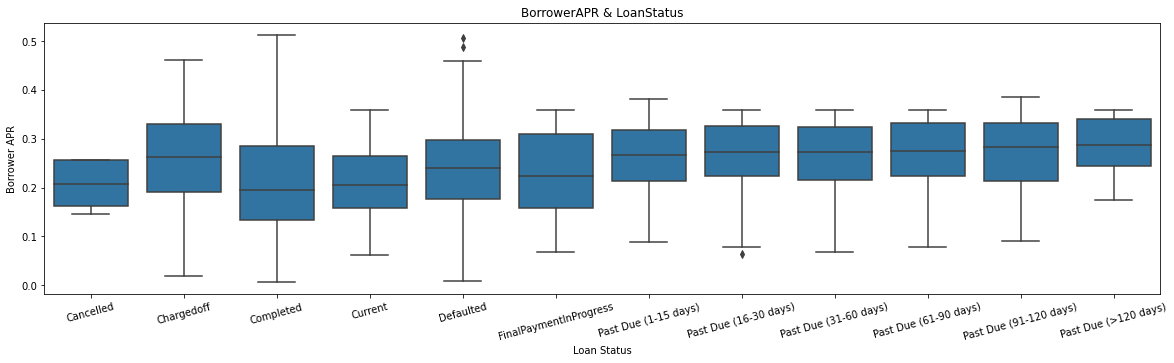

In [46]:
# Borrower APR vs Status of Loan 
plt.figure(figsize = [20, 5])
sb.boxplot(data=df_loans,y='BorrowerAPR',x='LoanStatus',color=base_color);
plt.title('BorrowerAPR & LoanStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=15);

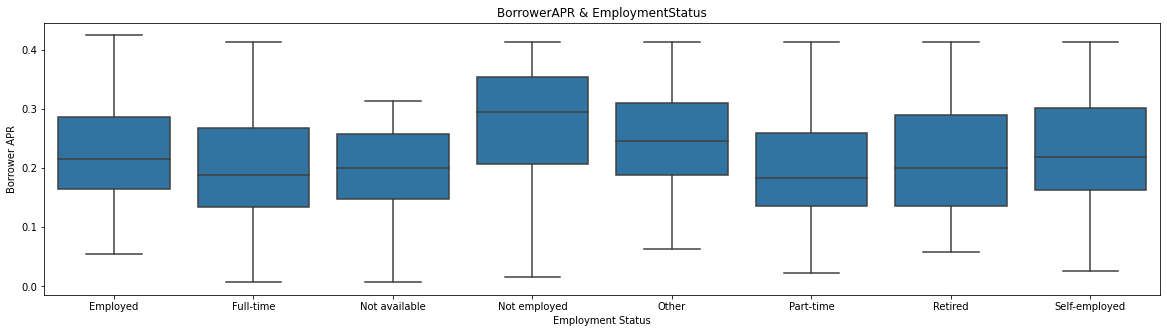

In [47]:
# Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

sb.boxplot(data=df_loans,y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

On BorrowerAPR vs LoanStatus graph we notice that Current and completed loans have lower rate than the past-due loans and have lower mean.
On Borrower APR vs Employment status graph we notice that Employed people have lower IQR than not employed

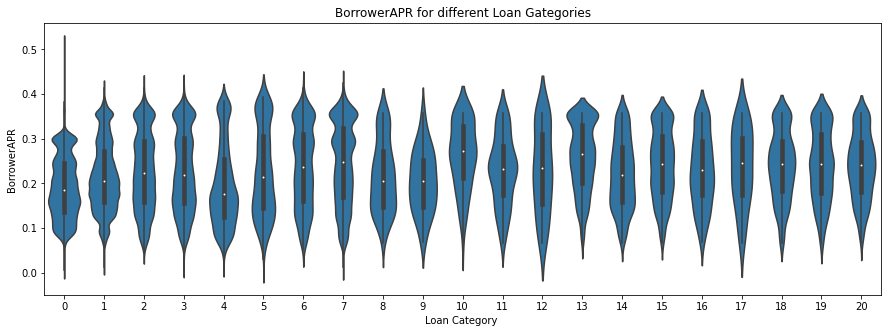

In [48]:
plt.figure(figsize = [15, 5])
sb.violinplot(data=df_loans,x='ListingCategory (numeric)', y='BorrowerAPR',color=base_color);
plt.title('BorrowerAPR for different Loan Gategories')
plt.xlabel('Loan Category ');
plt.ylabel('BorrowerAPR');

We can see that Cosmetic Procedures have higher interest rates with evenly dispersed data.
Listing Category: The grouping the borrower chose for their listing when they posted it: Not Available (0), 1 - Consolidating Debt, 2 - Improvement of the home Business, No. 3 Personal Loan #4, Student Use #5, and Auto, Other, and 6 Baby & Adoption, 8 9 - Boat, 10 Cosmetic Surgery, 11 - Ring of engagement, Green Loans (12), Household Expenses, Code 13 14 - Significant Purchases 15 - Dental/Medical, Motorcycle (16), RV (17), and taxes (18) 19 - Vacation; 20 - Loans for a wedding

#### Discuss some of the connections you noticed during this phase of the inquiry. What relationships did the relevant feature(s) have with other features in the dataset?

When EmploymentStatus and BorrowerAPR are compared:

In comparison to those who are employed, those without jobs pay higher interest rates.

The interest rate decreases as income increases.

Following the financial crisis of 2008, the initial loan amount was at its lowest; since then, it has risen year over year. From 2013 to 2014, the amount dramatically increases.

#### Have you seen any noteworthy connections between the other features (those that aren't the main feature(s) of interest)?
There is a high interest rate on the loan status for past due payments.

Self-employed individuals have a higher percentage of defaulted loans than those who are unemployed.

### Multivariate Exploration

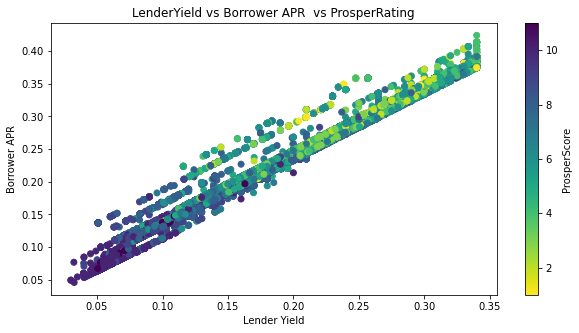

In [49]:
# LenderYield vs Borrower APR  vs ProsperRating
plt.figure(figsize = [10, 5])
plt.scatter(data=df_loans,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('LenderYield vs Borrower APR  vs ProsperRating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

All of the variables' relationships are evident, as can be seen. The lender yield and borrower APR have a straight positive inverse relationship, with the lender yield rising as the borrower pays more interest. Lower borrower interest rates and hence lower lender yields result with higher credit scores.

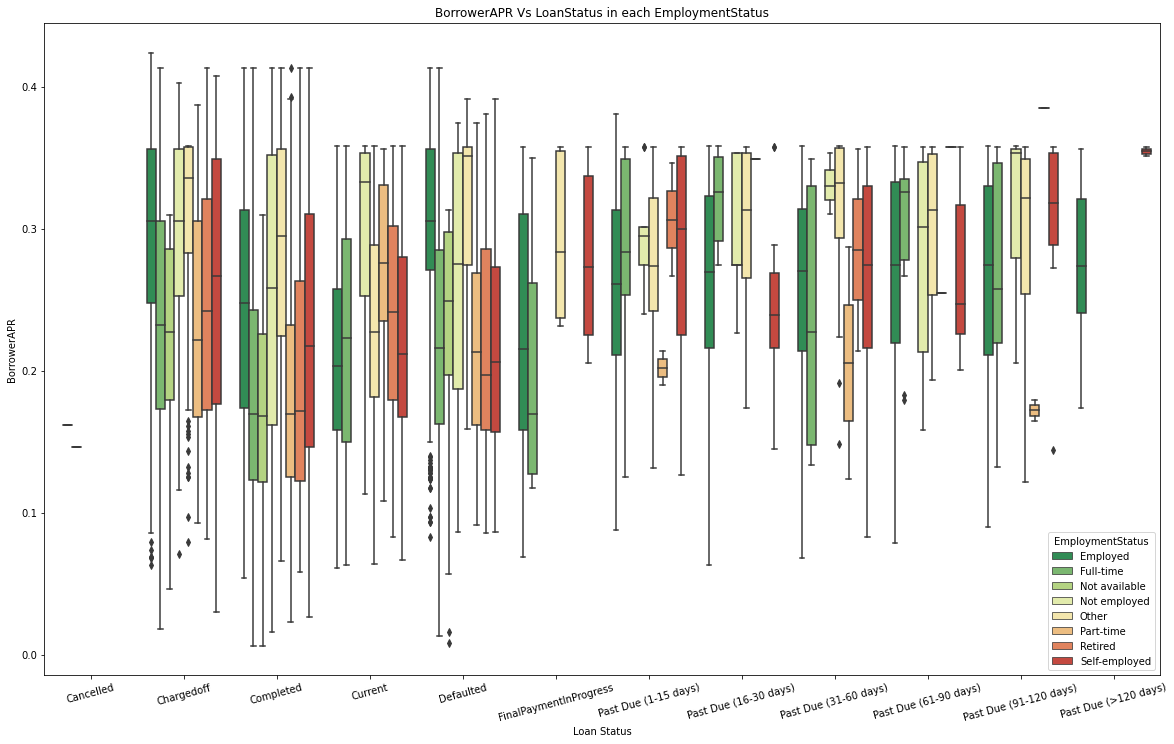

In [50]:
# LoanStatus Vs BorrowerAPR in each EmploymentStatus
plt.figure(figsize=[20,12])
sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus", data=df_loans, palette="RdYlGn_r");
plt.title('BorrowerAPR Vs LoanStatus in each EmploymentStatus');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 15);

The loan status categories with the lowest APRs are employed and full-time. The greatest APR is for those who are unemployed.

The majority of the high borrowerAPRs are completed, current, and charged off.

In terms of chargeoff and defaulted loan status, we observe several anomalies.

In [51]:
df_loans['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

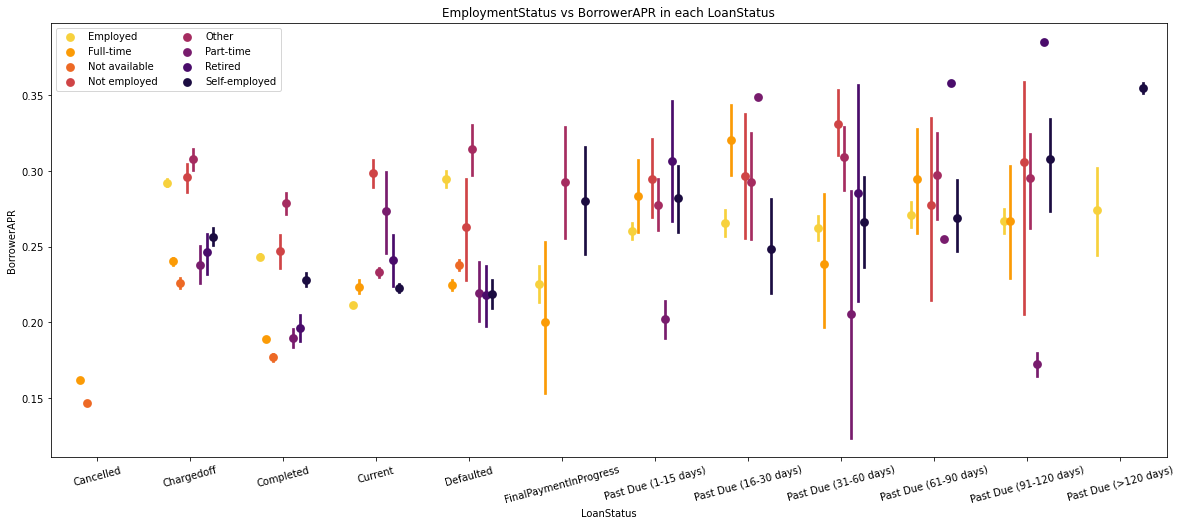

In [52]:
# EmploymentStatus vs BorrowerAPR in each LoanStatus
fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = df_loans, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

Past Due loans generally have higher interest rates in all employment statuses

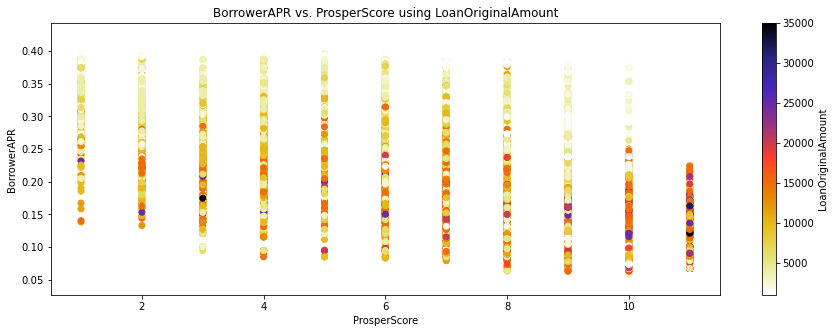

In [53]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data=df_loans[df_loans['StatedMonthlyIncome']<20000],x='ProsperScore',y='BorrowerAPR',c='LoanOriginalAmount',cmap=cm) 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore using LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

We can see that borrowers with higher prosper scores take out the majority of loans for sums over $20,000. (10 and above)

#### Discuss some of the connections you noticed during this phase of the inquiry. In terms of your feature(s) of interest, were there features that complemented one another?
EmploymentStatus, LoanStatus, and BorrowerAPR Relationship:

Employed people exhibit a wide range of loan statuses and borrower APRs; for example, they occasionally have high borrower rates, as in chargeoffs, and occasionally low borrower rates, as in past dues.

All loan status categories generally have lower BorrowerAPRs for employees who work full-time and part-time.

Employees who are Not-Employed & Self-Employed typically have lower BorrowerAPR in the current and finished statuses but higher BorrowerAPR in specific areas like the past dues.

#### Any intriguing or unexpected interactions between the features?

ProsperScore and BorrowerAPR were discovered to be negatively correlated, as higher prosper scores indicate reduced risk associated with the loan, which in turn results in lower APRs, which further reduce yield.